In [46]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import pandas as pd
from matplotlib.animation import FuncAnimation
import geopandas as gpd
import threedigrid
from threedigrid.admin.gridresultadmin import GridH5ResultAdmin
from threedigrid.admin.gridadmin import GridH5Admin

import uuid

In [47]:
from __my_functions_flooddepth_houses import get_time_dimensions_flood
from __my_functions_flooddepth_houses import create_df_flooddepth_houses
from __my_functions_flooddepth_houses import create_sample_houses_withinZone
from __my_functions_flooddepth_houses import calculate_first_qth_arrival_and_maxdepth
from __my_functions_flooddepth_houses import plot_flooddepth_houses_in_zone

### paths

In [48]:
## flood results paths
# floodresults_path = '/Users/louiseklingen/Documents/TU/modelresults/modelresults_denhelder' 
floodresults_path = 'E:/projecten/P2019_1_DenHelderOverstroming/data_en_modellen/modelresults' 

In [49]:
general_path = 'E:\paper2_analysis/depth_arrival_zones'
figures_path = f'{general_path}/figures'
input_path = f'{general_path}/input'
output_path = f'{general_path}/output'

-----------------------

### load flood results

In [50]:
## flood scenario 
scenario_name = 'scen1_voorpiek'
simulation_name = 'lk_dh_test13_5verloop_2d'
## start_breach_time = '2000-01-01T18:00:00'
start_breach_time = '2000-01-01T00:00:00'

In [51]:
## flood result files
netcdf_file = (f'{floodresults_path}/{simulation_name}/results_3di.nc')
gridadmin_file = (f'{floodresults_path}/{simulation_name}/gridadmin.h5')
gr = GridH5ResultAdmin(gridadmin_file , netcdf_file)
ga = GridH5Admin(gridadmin_file)

In [52]:
time_humanized, last_timestamp  = get_time_dimensions_flood(gr, start_breach_time)

rekentijd: 48.00278541015558 uur
aantal tijdstappen: 577
interval: 300.05, secondes = 5.0 min
 breach start time at: 2000-01-01 00:00:00


----------------

## load buurten and houses in area

In [85]:
buurten_scen2_test = gpd.read_file(f'{input_path}/buurten_scen2_test.shp')
# buurten_scen2_test.columns

In [9]:
houses_all = gpd.read_file(f'{input_path}/huizen_centroid_flood_area_cleaned.shp')

------------------------------------------------------------

In [60]:
def TEMPcalculate_first_qth_arrival_and_maxdepth(flooddepth_time_houses_df):
    arrival_times = []
    max_depths = []
    quantile_value = 0.1
    
    #loop over all (sample) houses within zone
    for house, flooddepths in flooddepth_time_houses_df.items():
        max_depth = flooddepths.max()
        max_depths.append(max_depth)
        print(max_depth)

        for i in range(len(flooddepths)):
            if flooddepths[i] > 0.01:
                arrival_time = flooddepth_time_houses_df.index[i]
                arrival_timestamp = datetime.timestamp(arrival_time)
                arrival_times.append(arrival_timestamp)
                break
                

                
    #derive arrival for zone
#     print(arrival_times)
#     first_qth_arrival = np.quantile(arrival_times, quantile_value)
#     first_qth_arrival_dt = datetime.fromtimestamp(first_qth_arrival)
    
    
    #derive max depth for zone
#     max_depth = max(max_depths)
    
    return arrival_times

##  one random zone for testing

In [55]:
random_index = 35
selected_zone = buurten_scen2_test.iloc[random_index]
selected_zone_geom = selected_zone.geometry
# selected_zone_geom

#### alle functies los voor debugging

#### 1) create sample

nr houses in Marina: 545
too many, therefor sample of 30 houses taken
Marina


,h_maaiveld,dak_type,huis_id,cell_id,sumax,z_cell,geometry
9361,0.307,slanted,52057,13685.0,6400.0,-1.5,POINT (114016.456 551426.835)


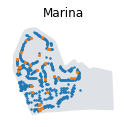

In [62]:
samplesize = 30
zone_name, houses_df = create_sample_houses_withinZone(samplesize, houses_all, selected_zone )
print(zone_name)
houses_df.head(1)

#### 2)  compute flood depth(t)at this sample

In [63]:
flooddepth_time_houses_df = create_df_flooddepth_houses(scenario_name, samplesize, zone_name,
                                                            houses_df, gr, time_humanized, last_timestamp, output_path)
flooddepth_time_houses_df.tail(1)

,id_52057,id_51791,id_52221,id_52229,id_52773,id_52616,id_46780,id_52683,id_47014,id_52062,...,id_51743,id_52591,id_52068,id_52186,id_52021,id_52132,id_52150,id_52710,id_52808,id_52881
2000-01-03 00:00:10,1.433119,0.130203,1.255511,1.06853,1.518595,0.830541,1.307356,0.95047,1.308356,0.58753,...,0.0,0.670537,1.194122,0.798913,0.341034,1.42986,1.179032,1.020523,1.539595,0.718349


In [71]:
flooddepth_time_houses_df.values.max()

2.9772995618341027

#### 3)  compute one value first arrival and max depth for zone

In [65]:
TEMPcalculate_first_qth_arrival_and_maxdepth(flooddepth_time_houses_df)

2.878045996826316
1.5442860437679917
2.6941754421585298
2.5026461804007987
2.956299561834103
2.267936993927256
2.748096892645405
2.388105786290874
2.749096892645405
2.021646180400799
2.7919151163905265
2.0346461804007987
2.469665494562772
2.1937069058687975
2.8603793525836956
1.256802907780929
2.7585334807617192
1.3702860437679918
1.287802907780929
2.159473376967838
1.371802907780929
2.108856034297337
2.638755907182615
2.244937009783742
1.7855334807617194
2.8755318784695585
2.6257900667721272
2.4613420524107683
2.9772995618341027
2.15594578050837


30

In [38]:
first_qth_arrival, max_depth  = TEMPcalculate_first_qth_arrival_and_maxdepth(flooddepth_time_houses_df)
first_qth_arrival, max_depth

[]


ValueError: not enough values to unpack (expected 2, got 0)

#### 4) plot flood depth in zone

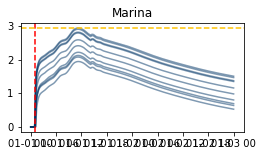

In [22]:
plot_flooddepth_houses_in_zone(zone_name,flooddepth_time_houses_df, first_qth_arrival,max_depth, time_humanized)

----------------------------

## selection of zones

In [93]:
selected_zones = buurten_scen2_test.iloc[:15]
# selected_zones

In [94]:
zones_maxdepth_arrival_df = selected_zones[["BU_NAAM", 'geometry', 'AANT_INW']].copy()
zones_maxdepth_arrival_df["maxdepth"] = np.nan
zones_maxdepth_arrival_df["arrival"] = np.nan
# zones_maxdepth_arrival_df

nr houses in Marinehaven: 303
too many, therefor sample of 15 houses taken
nr houses in Oostsloot: 989
too many, therefor sample of 15 houses taken
nr houses in Centrum: 610
too many, therefor sample of 15 houses taken
nr houses in Willemsoord: 244
too many, therefor sample of 15 houses taken
nr houses in Sluisdijk: 531
too many, therefor sample of 15 houses taken
nr houses in Visbuurt: 1913
too many, therefor sample of 15 houses taken
nr houses in Grachtengordel: 468
too many, therefor sample of 15 houses taken
nr houses in Havenbuurt: 123
too many, therefor sample of 15 houses taken
nr houses in Vogelbuurt: 1770
too many, therefor sample of 15 houses taken
nr houses in Mijnendienst: 103
too many, therefor sample of 15 houses taken


C:\Users\Louise\Documents\python_omnitrans\__my_functions_flooddepth_houses.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 2))


nr houses in Oud Den Helder: 1933
too many, therefor sample of 15 houses taken
nr houses in Van Galenbuurt: 1520
too many, therefor sample of 15 houses taken
nr houses in Indische buurt-Noord: 700
too many, therefor sample of 15 houses taken
nr houses in Indische buurt-Zuid: 765
too many, therefor sample of 15 houses taken
nr houses in Geleerdenbuurt: 1096
too many, therefor sample of 15 houses taken


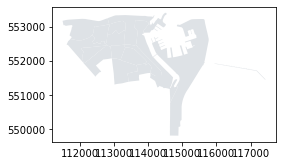

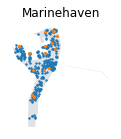

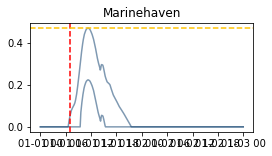

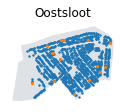

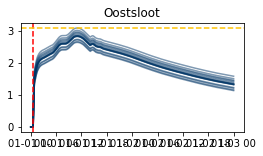

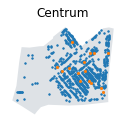

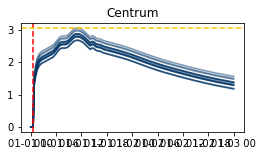

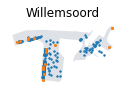

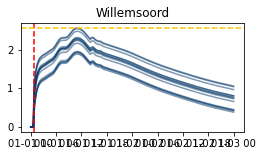

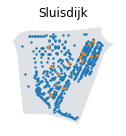

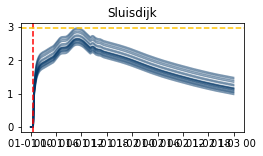

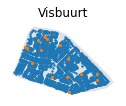

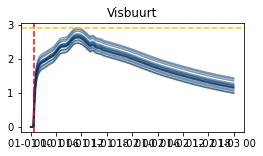

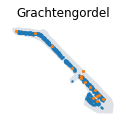

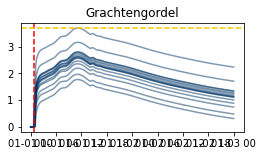

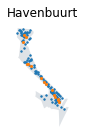

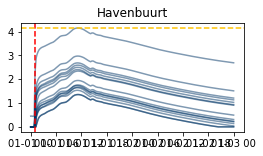

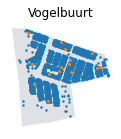

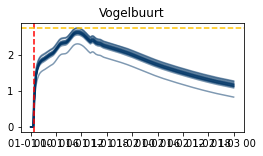

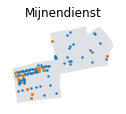

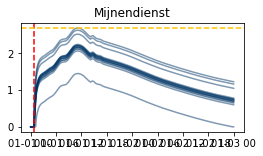

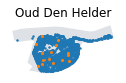

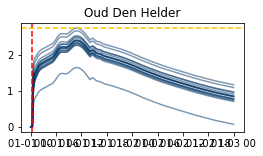

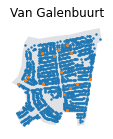

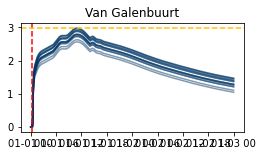

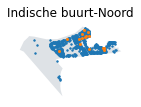

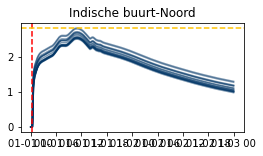

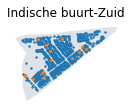

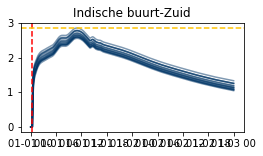

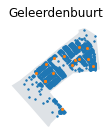

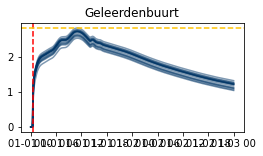

In [95]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)

samplesize = 15

for index, row in zones_maxdepth_arrival_df.iterrows():
    gpd.GeoSeries(row.geometry).plot(ax=ax, color="#dee2e6")
    
    #create sample for all seleced zones
    zone_name, houses_df = create_sample_houses_withinZone(samplesize, houses_all, selected_zone = row )

    # compute flood depth(t)at this sample
    flooddepth_time_houses_df = create_df_flooddepth_houses(scenario_name, samplesize, zone_name,
                                                            houses_df, gr, time_humanized, last_timestamp, output_path)

    if flooddepth_time_houses_df.values.max() > 0:
    
        # compute one value first arrival and max depth for zone
        first_qth_arrival_dt, max_depth  = calculate_first_qth_arrival_and_maxdepth(flooddepth_time_houses_df)


        if max_depth > 0:
            zones_maxdepth_arrival_df.loc[index, "maxdepth"] = max_depth

        if datetime.timestamp(first_qth_arrival_dt) > 0:
            zones_maxdepth_arrival_df.loc[index, "arrival"] = first_qth_arrival_dt
        
    
    #plot flood depth in zone
    plot_flooddepth_houses_in_zone(zone_name,flooddepth_time_houses_df, first_qth_arrival_dt,max_depth, time_humanized)
    


In [97]:
zones_maxdepth_arrival_df

,BU_NAAM,geometry,AANT_INW,maxdepth,arrival
0,Marinehaven,"MULTIPOLYGON (((116195.075 551883.114, 116203....",0,0.473150,2000-01-01 06:57:00.300000
1,Oostsloot,"POLYGON ((113271.703 553153.125, 113316.297 55...",1115,3.085401,2000-01-01 00:35:03
2,Centrum,"POLYGON ((113147.180 552784.186, 113180.703 55...",1405,3.062449,2000-01-01 00:35:03
3,Willemsoord,"POLYGON ((114505.462 553406.820, 114513.633 55...",415,2.556770,2000-01-01 00:40:03
4,Sluisdijk,"POLYGON ((113296.398 552444.375, 113320.602 55...",1010,2.978254,2000-01-01 00:35:03
5,Visbuurt,"POLYGON ((113370.898 552390.000, 113443.297 55...",2405,2.918478,2000-01-01 00:40:03
6,Grachtengordel,"POLYGON ((113365.500 552479.625, 113478.602 55...",715,3.701468,2000-01-01 00:50:03
7,Havenbuurt,"POLYGON ((113748.602 553180.625, 113864.297 55...",20,4.148586,2000-01-01 00:55:03
8,Vogelbuurt,"POLYGON ((112994.000 552072.000, 113043.500 55...",1855,2.747536,2000-01-01 00:40:03
9,Mijnendienst,"POLYGON ((113921.500 551868.375, 113990.398 55...",100,2.694130,2000-01-01 00:50:03


(10957.0, 10957.173645833333)

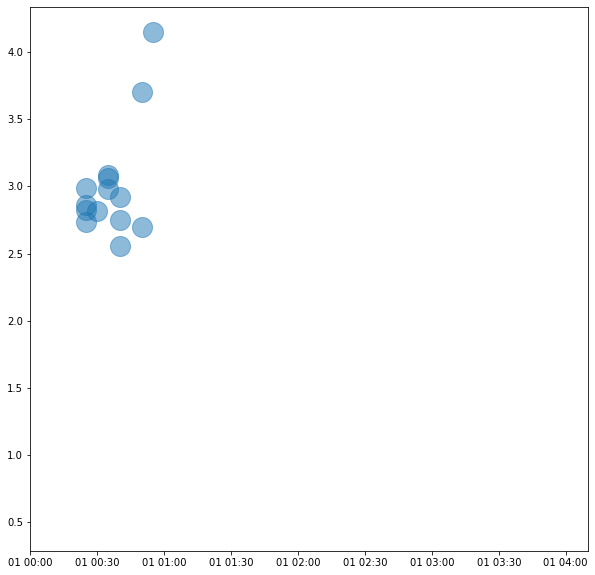

In [98]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(zones_maxdepth_arrival_df.arrival,zones_maxdepth_arrival_df.maxdepth, s = 400, alpha= 0.5 )
ax.set_xlim(time_humanized[0],time_humanized[50] )

In [ ]:
def plot_flooddepth_houses_in_zone(zone_name, flooddepth_time_houses_df,first_qth_arrival,max_depths_qth, time_humanized):
    fig = plt.figure(figsize=(2, 2))
    ax = fig.add_subplot(1, 1, 1)

    for label, content in flooddepth_time_houses_df.items():
        ax.plot(content, c = '#003566', alpha = 0.5)

    ax.set_xlim(time_humanized[0],time_humanized[40])
    ax.axvline(x = first_qth_arrival, color = 'r', linestyle ='--')
    ax.axhline(max_depths_qth, color= '#ffc300', linestyle ='--')
    plt.title(f'{zone_name}')
